In [1]:
!wget https://www.dropbox.com/scl/fi/owk9udhb67unkxmmpqxuu/data.json?rlkey=epm3joq5td0g1cz8ejxlygxgu&st=jqtho6zp&dl=0
!mv /content/data.json?rlkey=epm3joq5td0g1cz8ejxlygxgu /content/data.json

--2024-06-16 16:32:45--  https://www.dropbox.com/scl/fi/owk9udhb67unkxmmpqxuu/data.json?rlkey=epm3joq5td0g1cz8ejxlygxgu
Resolving www.dropbox.com (www.dropbox.com)... 162.125.71.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.71.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf86ef8eb5449b978970c0cfb3d.dl.dropboxusercontent.com/cd/0/inline/CU-jWChugnOqN97xqT-e9GAezskJR8pMtaknCvTKlJtSdM40kNdIJdb0e5j49RT4z8a-mnNtpi4gWpLRHF0RrTjDvzP2hjoVm3Gooj6gKC047MKcTwhUuKS50hkTKU7oC_bLxwlgVEXbKkndPZsw9mRl/file# [following]
--2024-06-16 16:32:45--  https://ucf86ef8eb5449b978970c0cfb3d.dl.dropboxusercontent.com/cd/0/inline/CU-jWChugnOqN97xqT-e9GAezskJR8pMtaknCvTKlJtSdM40kNdIJdb0e5j49RT4z8a-mnNtpi4gWpLRHF0RrTjDvzP2hjoVm3Gooj6gKC047MKcTwhUuKS50hkTKU7oC_bLxwlgVEXbKkndPZsw9mRl/file
Resolving ucf86ef8eb5449b978970c0cfb3d.dl.dropboxusercontent.com (ucf86ef8eb5449b978970c0cfb3d.dl.dropboxusercontent.com)... 162.125.2.15, 2620:1

In [20]:
import json
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [3]:
DATASET_PATH = '/content/data.json'
EPOCHS = 50
BATCH_SIZE = 32

In [4]:
def load_data(dataset_path):
  with open(dataset_path) as fp:
    data = json.load(fp)

    # convert lists into numpy array
    inputs = np.array(data['mfcc'])
    targets = np.array(data['labels'])

    return inputs, targets

In [5]:
inputs, targets = load_data(DATASET_PATH)
train_X, test_X, train_y, test_y = train_test_split(inputs, targets, test_size=0.3)

In [6]:
model = Sequential()
model.add(Flatten(input_shape=(inputs.shape[1], inputs.shape[2])))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 1690)              0         
                                                                 
 dense (Dense)               (None, 512)               865792    
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 64)                16448     
                                                                 
 dense_3 (Dense)             (None, 10)                650       
                                                                 
Total params: 1014218 (3.87 MB)
Trainable params: 1014218 (3.87 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=EPOCHS, batch_size=BATCH_SIZE)

Epoch 1/50
219/219 [==============================] - 5s 8ms/step - loss: 7.0691 - accuracy: 0.3064 - val_loss: 2.8885 - val_accuracy: 0.3288
Epoch 2/50
219/219 [==============================] - 2s 7ms/step - loss: 2.1132 - accuracy: 0.3440 - val_loss: 2.1055 - val_accuracy: 0.3484
Epoch 3/50
219/219 [==============================] - 1s 7ms/step - loss: 1.8040 - accuracy: 0.3947 - val_loss: 2.0065 - val_accuracy: 0.3558
Epoch 4/50
219/219 [==============================] - 1s 6ms/step - loss: 1.6765 - accuracy: 0.4253 - val_loss: 1.9080 - val_accuracy: 0.3848
Epoch 5/50
219/219 [==============================] - 1s 4ms/step - loss: 1.5568 - accuracy: 0.4615 - val_loss: 1.9289 - val_accuracy: 0.4125
Epoch 6/50
219/219 [==============================] - 1s 4ms/step - loss: 1.4794 - accuracy: 0.4819 - val_loss: 1.9367 - val_accuracy: 0.3861
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 1.4242 - accuracy: 0.5066 - val_loss: 1.8632 - val_accuracy: 0.4071
Epoch 

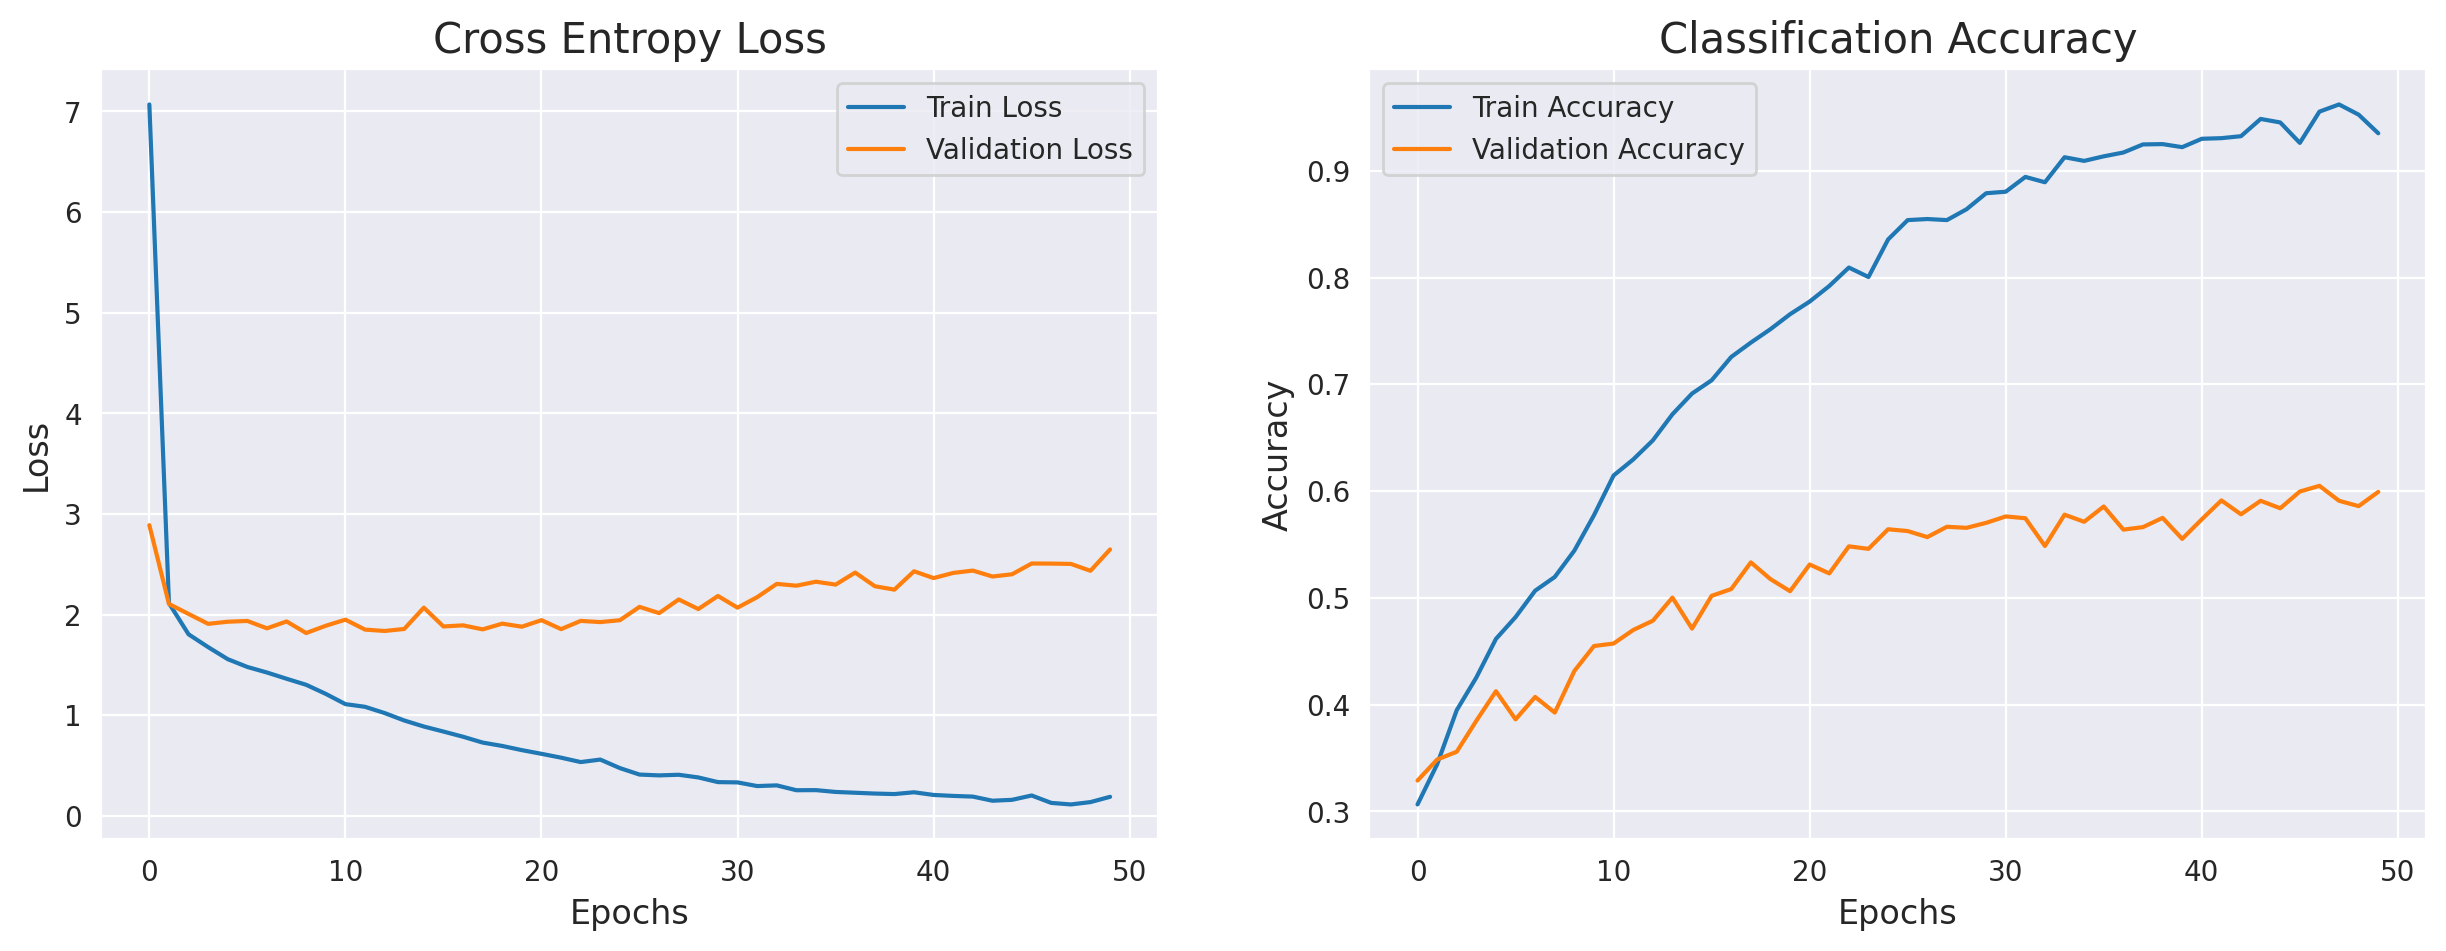

In [12]:
metrics = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(metrics['accuracy'], label='Train Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()

### Fixing overfitting

In [21]:
model = Sequential()

model.add(Flatten(input_shape=(inputs.shape[1], inputs.shape[2])))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 1690)              0         
                                                                 
 dense_15 (Dense)            (None, 512)               865792    
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 dropout_9 (Dropout)         (None, 256)               0         
                                                                 
 dense_17 (Dense)            (None, 64)                16448     
                                                                 
 dropout_10 (Dropout)        (None, 64)               

In [22]:
early_stopping = EarlyStopping(monitor='val_loss',
                              min_delta=0.001,
                              patience=5,
                              restore_best_weights=True,
                              verbose=True)

reduce_learning_rate = ReduceLROnPlateau(monitor='val_accuracy',
                                        patience=2,
                                        factor=0.5,
                                        verbose=True)

checkpoint = ModelCheckpoint('best_weights.h5', save_best_only=True, monitor='val_accuracy', mode='max')
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [23]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=True)

Epoch 1/50
219/219 [==============================] - 5s 7ms/step - loss: 23.8406 - accuracy: 0.1652 - val_loss: 3.4759 - val_accuracy: 0.2177
Epoch 2/50
219/219 [==============================] - 1s 5ms/step - loss: 6.2740 - accuracy: 0.1722 - val_loss: 3.4299 - val_accuracy: 0.1844
Epoch 3/50
219/219 [==============================] - 1s 5ms/step - loss: 4.4331 - accuracy: 0.1662 - val_loss: 3.4602 - val_accuracy: 0.1544
Epoch 4/50
219/219 [==============================] - 1s 5ms/step - loss: 3.9364 - accuracy: 0.1625 - val_loss: 3.4406 - val_accuracy: 0.1597
Epoch 5/50
219/219 [==============================] - 1s 5ms/step - loss: 3.6965 - accuracy: 0.1714 - val_loss: 3.4157 - val_accuracy: 0.1751
Epoch 6/50
219/219 [==============================] - 1s 5ms/step - loss: 3.5873 - accuracy: 0.1765 - val_loss: 3.3698 - val_accuracy: 0.1964
Epoch 7/50
219/219 [==============================] - 1s 5ms/step - loss: 3.5407 - accuracy: 0.1845 - val_loss: 3.3783 - val_accuracy: 0.1927
Epoch

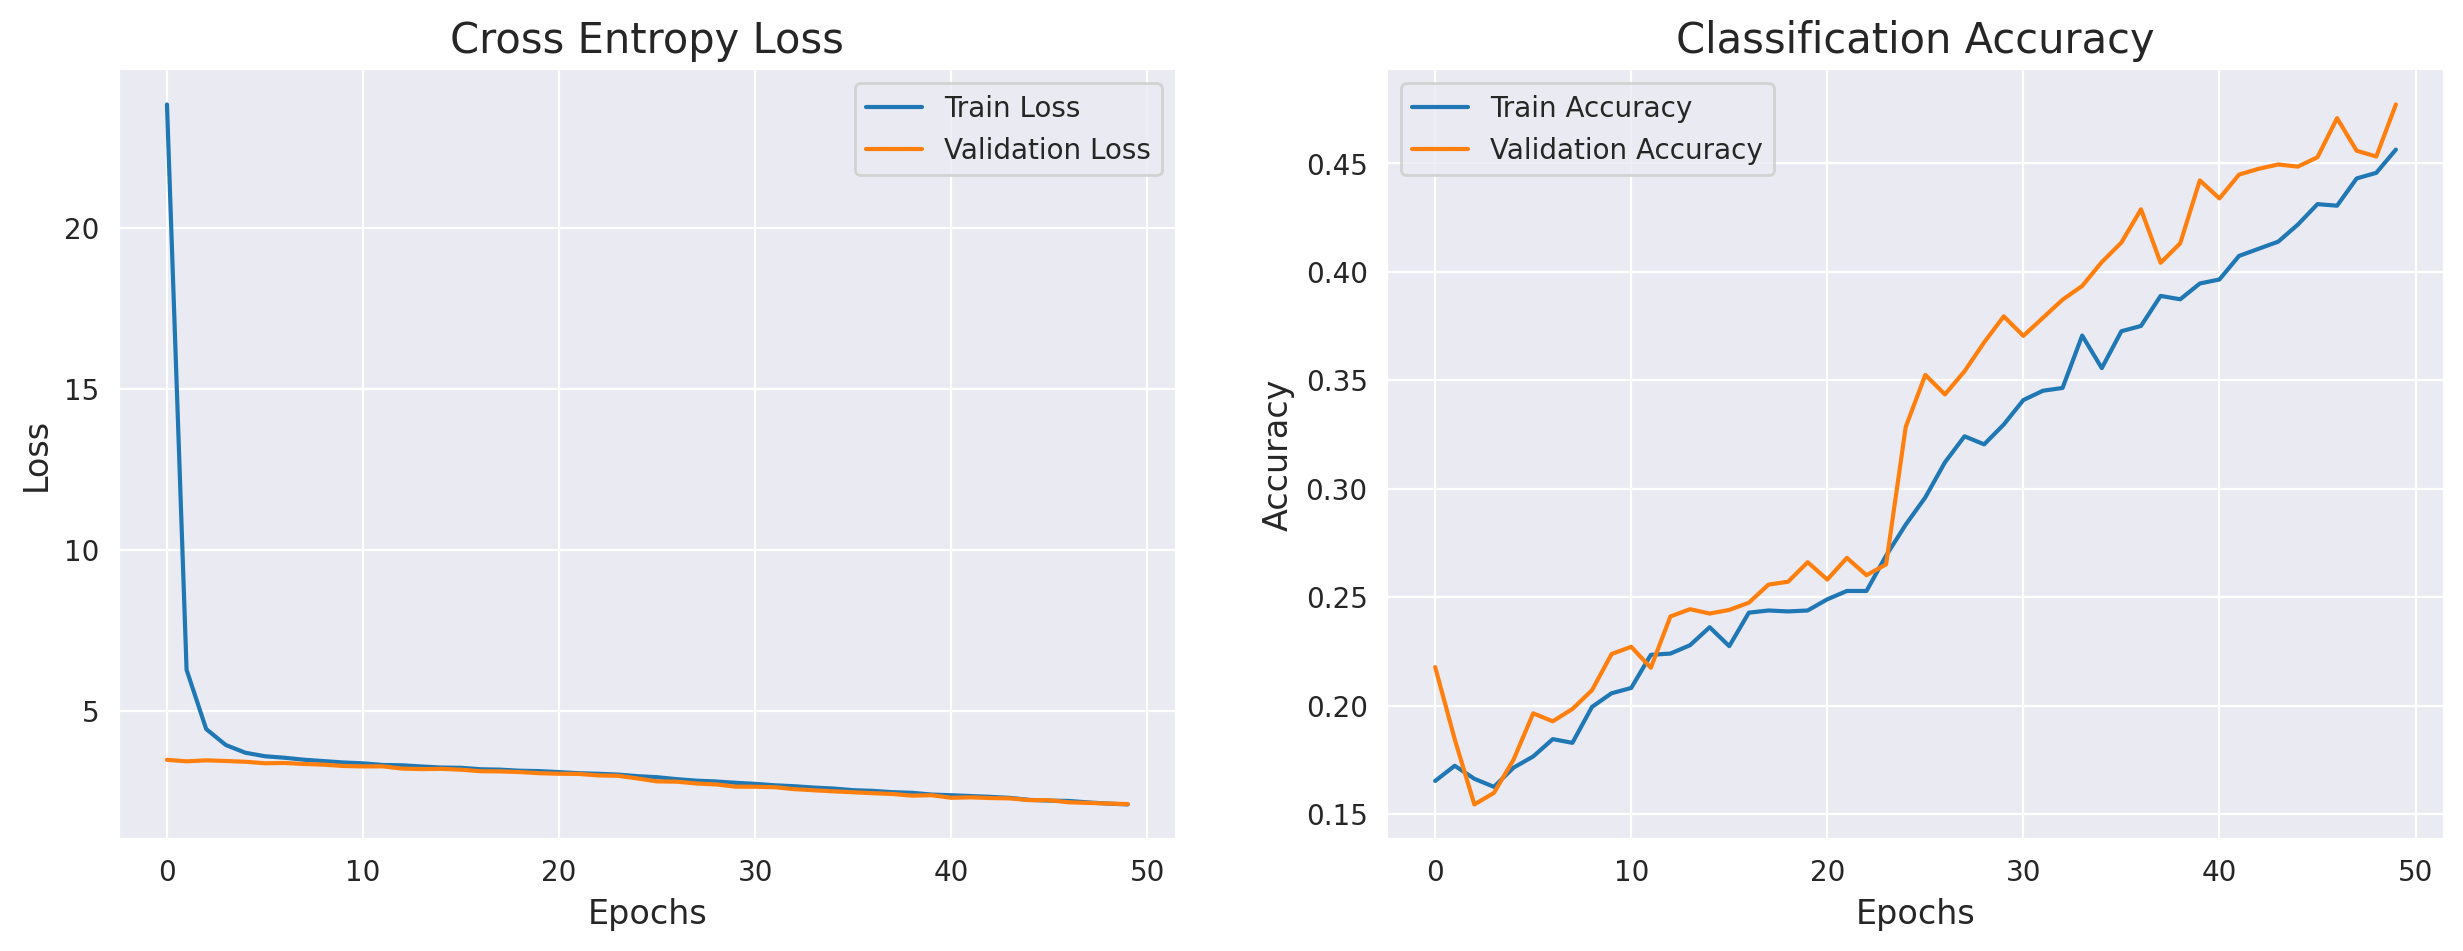

In [24]:
metrics = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5),dpi=200)
sns.set_style('darkgrid')

plt.subplot(121)
plt.title('Cross Entropy Loss',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Loss',fontsize=12)
plt.plot(metrics['loss'], label='Train Loss')
plt.plot(metrics['val_loss'], label='Validation Loss')
plt.legend()

plt.subplot(122)
plt.title('Classification Accuracy',fontsize=15)
plt.xlabel('Epochs',fontsize=12)
plt.ylabel('Accuracy',fontsize=12)
plt.plot(metrics['accuracy'], label='Train Accuracy')
plt.plot(metrics['val_accuracy'], label='Validation Accuracy')
plt.legend()

plt.show()